In [79]:
#Price
df['Price'].describe()

count    2024.000000
mean      179.162549
std       251.749985
min         5.000000
25%        22.000000
50%        94.000000
75%       180.000000
max      1299.000000
Name: Price, dtype: float64

In [77]:
#2023 vs 2024
df.groupby('Year')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2023,828.0,290.625604,337.912215,9.0,40.0,140.0,492.5,1299.0
2024,1196.0,101.995819,117.056575,5.0,20.0,65.0,137.0,470.0


In [83]:
#BF/CM vs Non-BF/CM days
df.groupby('BF_CM')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
BF_CM,,,,,,,,
0,1936.0,179.650310,251.764393,5.0,22.0,94.0,180.0,1299.0
1,88.0,168.431818,252.632976,5.0,21.0,77.0,165.0,1099.0


In [91]:
# Descriptive stats by product category
category_stats = df.groupby('Category')['Price'].describe()
category_stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Beauty,276.0,14.105072,3.760055,9.0,12.0,12.0,17.0,22.0
Home,644.0,106.628882,60.558678,30.0,40.0,94.0,170.0,232.0
Media,92.0,33.652174,2.620439,30.0,32.0,35.0,35.0,40.0
Tech,644.0,416.979814,327.436518,65.0,130.0,430.0,500.0,1299.0
Toys,276.0,14.246377,6.682745,5.0,6.0,18.0,20.0,22.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Load data
df = pd.read_excel("Cleaned_BF_CM_Data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

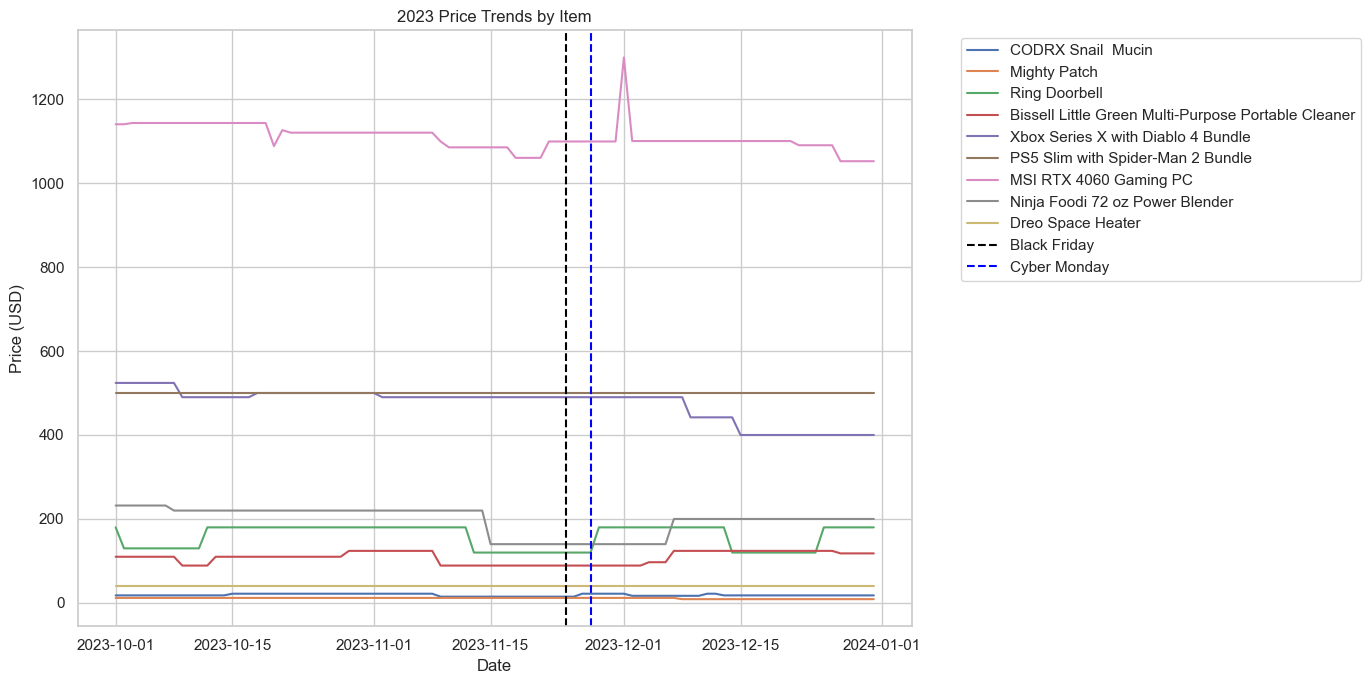

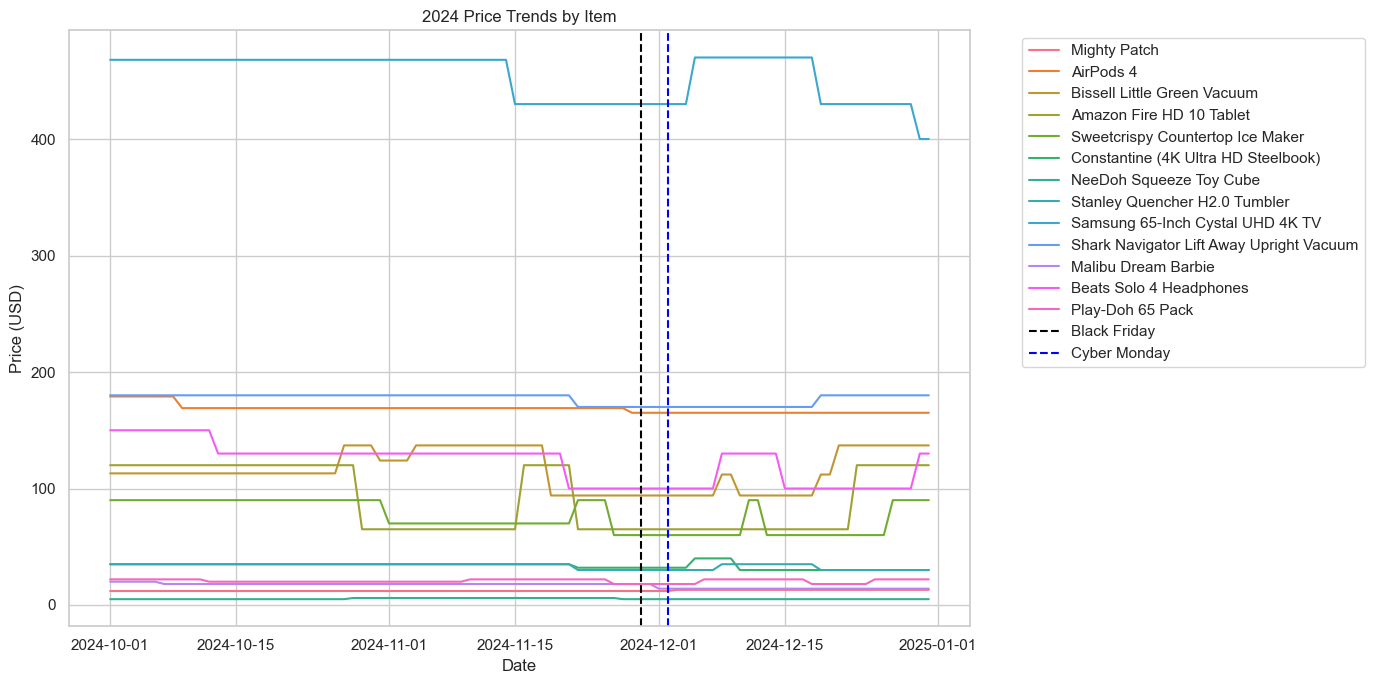

In [21]:
#Define dates
bf_cm_dates = {
    2023: {'BF': '2023-11-24', 'CM': '2023-11-27'},
    2024: {'BF': '2024-11-29', 'CM': '2024-12-02'}
}

#Loop through years
for year in [2023, 2024]:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df[df['Year'] == year], x='Date', y='Price', hue='Item')

    #Add lines for BF/CM
    plt.axvline(pd.to_datetime(bf_cm_dates[year]['BF']), color='black', linestyle='--', label='Black Friday')
    plt.axvline(pd.to_datetime(bf_cm_dates[year]['CM']), color='blue', linestyle='--', label='Cyber Monday')

    #Labels
    plt.title(f"{year} Price Trends by Item")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


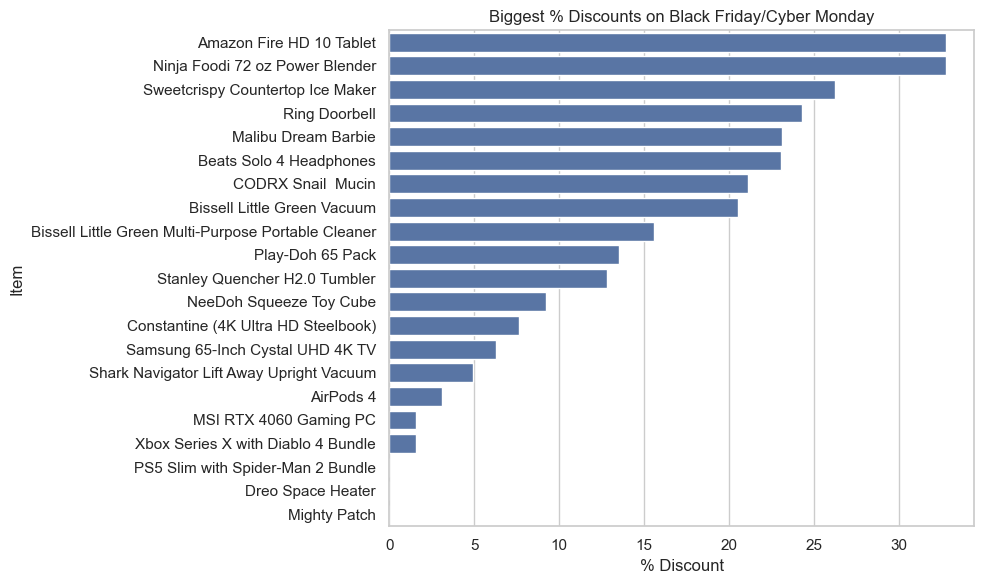

In [59]:
#Find average before BF/CM and lowest price during BF/CM
baseline = df[df['Period'] == 'Before'].groupby('Item')['Price'].mean()
deal = df[df['Period'] == 'BF/CM'].groupby('Item')['Price'].min()

discount_df = pd.DataFrame({
    'Baseline': baseline,
    'BF/CM Price': deal
})
discount_df['% Discount'] = ((discount_df['Baseline'] - discount_df['BF/CM Price']) / discount_df['Baseline']) * 100
discount_df = discount_df.dropna().sort_values('% Discount', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=discount_df['% Discount'], y=discount_df.index)
plt.title('Biggest % Discounts on Black Friday/Cyber Monday')
plt.xlabel('% Discount')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

In [89]:
#Create Categories
category_map = {
    'AirPods 4': 'Tech',
    'Beats Solo 4 Headphones': 'Tech',
    'Samsung 65-Inch Cystal UHD 4K TV': 'Tech',
    'Xbox Series X with Diablo 4 Bundle': 'Tech',
    'PS5 Slim with Spider-Man 2 Bundle': 'Tech',
    'MSI RTX 4060 Gaming PC': 'Tech',
    'Amazon Fire HD 10 Tablet': 'Tech',

    'CODRX Snail  Mucin': 'Beauty',
    'Mighty Patch': 'Beauty',

    'Bissell Little Green Vacuum': 'Home',
    'Bissell Little Green Multi-Purpose Portable Cleaner': 'Home',
    'Dreo Space Heater': 'Home',
    'Ninja Foodi 72 oz Power Blender': 'Home',
    'Sweetcrispy Countertop Ice Maker': 'Home',
    'Shark Navigator Lift Away Upright Vacuum': 'Home',
    'Stanley Quencher H2.0 Tumbler': 'Home',

    'NeeDoh Squeeze Toy Cube': 'Toys',
    'Play-Doh 65 Pack': 'Toys',
    'Malibu Dream Barbie': 'Toys',
    'Constantine (4K Ultra HD Steelbook)': 'Media'
}


df['Category'] = df['Item'].map(category_map)

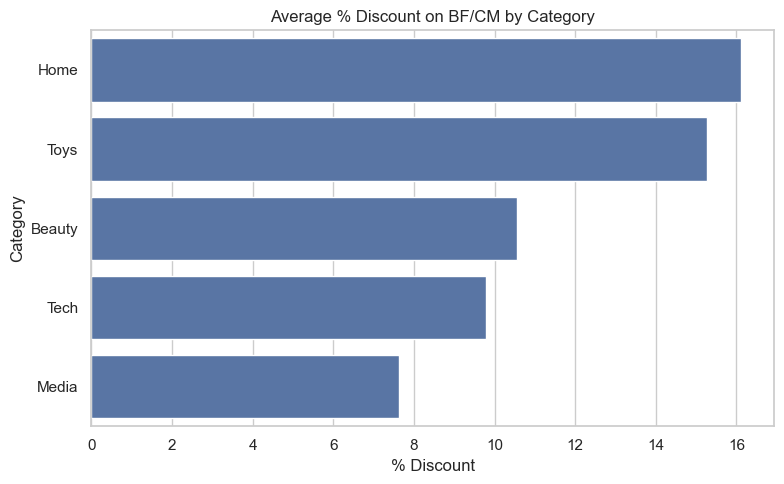

In [63]:
#Previous discount code
baseline = df[df['Period'] == 'Before'].groupby('Item')['Price'].mean()
deal = df[df['Period'] == 'BF/CM'].groupby('Item')['Price'].min()
discount_df = pd.DataFrame({'Baseline': baseline, 'BF/CM Price': deal})
discount_df['% Discount'] = ((discount_df['Baseline'] - discount_df['BF/CM Price']) / discount_df['Baseline']) * 100
discount_df = discount_df.dropna().reset_index()

#Add category
discount_df['Category'] = discount_df['Item'].map(category_map)

#Average discount by category
category_discount = discount_df.groupby('Category')['% Discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_discount.values, y=category_discount.index)
plt.title('Average % Discount on BF/CM by Category')
plt.xlabel('% Discount')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [65]:
import pandas as pd

#Load dataset
df = pd.read_excel("Cleaned_BF_CM_Data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

#Days since Oct 1
df['Days_Since_Start'] = (df['Date'] - pd.to_datetime(df['Year'].astype(str) + '-10-01')).dt.days

#Label BF/CM
def label_period(row):
    if row['Year'] == 2023:
        if '2023-11-24' <= row['Date'].strftime('%Y-%m-%d') <= '2023-11-27':
            return 1
    elif row['Year'] == 2024:
        if '2024-11-29' <= row['Date'].strftime('%Y-%m-%d') <= '2024-12-02':
            return 1
    return 0

df['BF_CM'] = df.apply(label_period, axis=1)

In [67]:
#Encode item or category
df_encoded = pd.get_dummies(df, columns=['Item'], drop_first=True)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded[['Days_Since_Start', 'BF_CM'] + [col for col in df_encoded.columns if col.startswith('Item_')]]
y = df_encoded['Price']

#Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions and evaluation
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9938994498394742
RMSE: 18.182913151501438


C:\Users\kylew\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [71]:
# View feature impact
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
display(coef_df)

,Feature,Coefficient
9,Item_MSI RTX 4060 Gaming PC,939.086067
14,Item_PS5 Slim with Spider-Man 2 Bundle,331.812274
21,Item_Xbox Series X with Diablo 4 Bundle,307.691523
17,Item_Samsung 65-Inch Cystal UHD 4K TV,286.637864
13,Item_Ninja Foodi 72 oz Power Blender,26.867563
18,Item_Shark Navigator Lift Away Upright Vacuum,8.487885
0,Days_Since_Start,-0.201882
1,BF_CM,-8.465878
16,Item_Ring Doorbell,-10.370420
3,Item_Beats Solo 4 Headphones,-46.794228
